## CuffDiff Summary
### Author: Xiang Li



In [1]:
import numpy as np
import pandas as pd
import os
# Plot Package
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline



In [250]:
from pybedtools import BedTool
import datetime
today = str(datetime.date.today())


In [3]:
def Features_Return_exp_and_obser(PATH_Feature_A, PATH_Region_B, genomeSize, title):
    
    Feature_A=BedTool(PATH_Feature_A).sort()
    genomeSize=2620345972
    f_ex = len(Feature_A)/genomeSize


    Region_B =BedTool(PATH_Region_B).sort()
    df_Feature_B = pd.read_csv(Region_B.fn, sep="\t", header=None)
    total_Region_B_length = (df_Feature_B.iloc[:,2]-df_Feature_B.iloc[:,1]).sum()
    N_ex = f_ex*total_Region_B_length


    N_obser = len(Feature_A.intersect(Region_B, u=True))
    

    index = [title+str(len(df_Feature_B))]
    df = pd.DataFrame({'observed': N_obser, 'exp': N_ex}, index=index)
    ax = df.plot.bar(rot=0)
    plt.title('Obs/Exp Ratio: ' + str(N_obser/N_ex))
    return N_ex, N_obser, N_obser/N_ex

def Features_Return_ob_exp_ratio(PATH_Feature_A, PATH_Region_B, genomeSize):
    
    Feature_A=BedTool(PATH_Feature_A).sort()
    genomeSize=2620345972
    f_ex = len(Feature_A)/genomeSize


    Region_B =BedTool(PATH_Region_B).sort()
    df_Feature_B = pd.read_csv(Region_B.fn, sep="\t", header=None)
    total_Region_B_length = (df_Feature_B.iloc[:,2]-df_Feature_B.iloc[:,1]).sum()
    N_ex = f_ex*total_Region_B_length


    N_obser = len(Feature_A.intersect(Region_B, u=True))
    

    
    return N_obser/N_ex

def hexbin_with_density(df, highlight_name, title_name, density_scale, drop_top_outlier):
    ### drop outlier
    df = df.drop(df.iloc[:,0].nlargest(n=drop_top_outlier,keep='first').index)
    
    
    range_limit=df.max().max()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 9), sharex=False, sharey=False)
    
    if density_scale == 'log':
        hb = ax.hexbin(df.iloc[:,[0]], df.iloc[:,[1]], gridsize=(100,100), cmap=plt.cm.jet,
                   bins='log',mincnt=0.1,alpha=2, edgecolors='face')
        cb = fig.colorbar(hb,ax=ax)
        cb.set_label('Log$_{10}$(1+Counts)', fontsize=18)
    else:
        hb = ax.hexbin(df.iloc[:,[0]], df.iloc[:,[1]], gridsize=(100,100), cmap=plt.cm.jet,
                   mincnt=0.1,alpha=2, edgecolors='face')
        cb = fig.colorbar(hb,ax=ax)
        cb.set_label('Counts', fontsize=18)

    ###  highlight a point
    if len(highlight_name) >= 1:
        for highlight_index in highlight_name[:]:
            if (highlight_index in df.index):
                ax.scatter(df[df.index == highlight_index].iloc[:,[0]],
                            df[df.index == highlight_index].iloc[:,[1]],
                            alpha=1.0,s=50,color='red', label=highlight_index,edgecolor='red')
                ax.text(df[df.index == highlight_index].iloc[:,0]-range_limit/20.0,
                          df[df.index == highlight_index].iloc[:,1]+range_limit/25.0, highlight_index, fontsize=16, color='r')
            else:
                continue

    ax.yaxis.grid(False)
    ax.set_ylim(-1.1*range_limit,range_limit+0.1*range_limit)
    ax.set_xlim(-1.1*range_limit,range_limit+0.1*range_limit)
    ax.set_xlabel(str(df.columns[0]), fontsize=18)
    ax.set_ylabel(str(df.columns[1]), fontsize=18)
    ax.plot([-0.1*range_limit,range_limit+0.1*range_limit], [-0.1*range_limit, range_limit+0.1*range_limit], ls="--", c="gray")
    ax.set_title(str(len(df))+ ': '+ title_name , fontsize=18)
    return 0

In [52]:
## Norm KR
PATH_FEATURES='/home/xli/Data/Haihui/CD8-HP/Summary/'

df_WT_16_AB_ref = pd.read_csv('AB_Compartment_Score_WT_DKO_CD8.bdg', sep="\t", header=0)
df_WT_16_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_KR/WT_CD8_2016_AB.bdg', sep="\t", header=None)
df_DKO_16_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_KR/DKO_CD8_2016_AB.bdg', sep="\t", header=None)
df_WT_19_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_KR/WT_CD8_2019_AB.bdg', sep="\t", header=None)
df_DKO_19_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_KR/DKO_CD8_2019_AB.bdg', sep="\t", header=None)
df_AB_with_Tcf1 = pd.read_csv(PATH_FEATURES+'AB_Compartment_Score_WT_DKO_CD8_with_Tcf1_Number.bdg', sep="\t", header=0)

In [240]:
## Norm None
PATH_FEATURES='/home/xli/Data/Haihui/CD8-HP/Summary/'

df_WT_16_AB_ref = pd.read_csv('AB_Compartment_Score_WT_DKO_CD8.bdg', sep="\t", header=0)
df_WT_16_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_None/WT_CD8_2016_AB.bdg', sep="\t", header=None)
df_DKO_16_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_None/DKO_CD8_2016_AB.bdg', sep="\t", header=None)
df_WT_19_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_None/WT_CD8_2019_AB.bdg', sep="\t", header=None)
df_DKO_19_AB = pd.read_csv(PATH_FEATURES+'AB/Norm_None/DKO_CD8_2019_AB.bdg', sep="\t", header=None)
df_AB_with_Tcf1 = pd.read_csv(PATH_FEATURES+'AB_Compartment_Score_WT_DKO_CD8_with_Tcf1_Number.bdg', sep="\t", header=0)

In [241]:
df_AB_summary = df_WT_16_AB.merge(df_DKO_16_AB, on=[0,1,2], suffixes=['_WT_16','_DKO_16']).merge(df_WT_19_AB.merge(df_DKO_19_AB, on=[0,1,2], suffixes=['_WT_19','_DKO_19']), on=[0,1,2]).dropna()
df_AB_summary = df_AB_summary[df_AB_summary['3_WT_19'].apply(lambda x : False if x == 'WARNING:' else False if x == 'WARN' else True)]
df_AB_summary = df_AB_summary.rename(columns={0:'#chr', 1:'start', 2:'end'})
df_AB_summary = df_AB_summary.merge(df_WT_16_AB_ref, on=['#chr','start','end']).rename(columns={'WT':'WT_16_Ref'})
df_AB_summary.loc[:,['3_WT_16', '3_DKO_16', '3_WT_19', '3_DKO_19', 'WT_16_Ref']] = df_AB_summary.loc[:,['3_WT_16', '3_DKO_16', '3_WT_19', '3_DKO_19','WT_16_Ref']].astype(float)

df_AB_group = df_AB_summary.groupby('#chr')
df_corr_set=pd.DataFrame()
df_Norm_set=pd.DataFrame()

df_summary = [pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]

for group_name in df_AB_group:
    #print (group_name[0])
    df_chr = group_name[1].loc[:,['3_WT_16', '3_DKO_16', '3_WT_19', '3_DKO_19', 'WT_16_Ref']]#.astype(float)
    
    for i in range(0,4):
        Corr_with_ref = df_chr.iloc[:,[i,4]].corr().iloc[0,1]
        if (Corr_with_ref<0):
            df_Norm_set.loc[group_name[0],df_chr.columns[i][2:]+'_WT_16_Ref']=-1
            df_summary[i] = pd.concat( [df_summary[i], df_chr.iloc[:,i]*-1], axis=0)
        else:
            df_Norm_set.loc[group_name[0],df_chr.columns[i][2:]+'_WT_16_Ref']=1
            df_summary[i] = pd.concat( [df_summary[i], df_chr.iloc[:,i]], axis=0)
        for j in range(0,i):
            #print (i,j)
            #print(df_chr.iloc[:,[i,j]].corr())
            df_corr_set.loc[group_name[0], 'chr']=group_name[0]
            COL_NAME=df_chr.columns[i][2:]+'_'+df_chr.columns[j][2:]
            CORR_VALUE=df_chr.iloc[:,[i,j]].corr().iloc[0,1]
            
            df_corr_set.loc[group_name[0],COL_NAME]=CORR_VALUE
df_corr_set = abs(df_corr_set.iloc[:,1:])

df_AB_summary['Diff_16'] = df_AB_summary['3_DKO_16'] - df_AB_summary['3_WT_16']
df_AB_summary['Diff_19'] = df_AB_summary['3_DKO_19'] - df_AB_summary['3_WT_19']

df_summary_Norm = pd.DataFrame(data={'#chr':df_AB_summary['#chr'], 'start':df_AB_summary['start'], 'end':df_AB_summary['end'], '3_WT_16': df_summary[0][0], '3_DKO_16':df_summary[1][0],
                   '3_WT_19':df_summary[2][0], '3_DKO_19':df_summary[3][0], 'WT_16_Ref':df_AB_summary['WT_16_Ref']})

In [242]:
#using Norm

df_AB_group = df_summary_Norm.groupby('#chr')
df_corr_set=pd.DataFrame()
df_Norm_set=pd.DataFrame()


for group_name in df_AB_group:
    #print (group_name[0])
    df_chr = group_name[1].loc[:,['3_WT_16', '3_DKO_16', '3_WT_19', '3_DKO_19', 'WT_16_Ref']]#.astype(float)
    
    for i in range(0,4):
        Corr_with_ref = df_chr.iloc[:,[i,4]].corr().iloc[0,1]
        if (Corr_with_ref<0):
            df_Norm_set.loc[group_name[0],df_chr.columns[i][2:]+'_WT_16_Ref']=-1
        else:
            df_Norm_set.loc[group_name[0],df_chr.columns[i][2:]+'_WT_16_Ref']=1
        for j in range(0,i):
            #print (i,j)
            #print(df_chr.iloc[:,[i,j]].corr())
            df_corr_set.loc[group_name[0], 'chr']=group_name[0]
            COL_NAME=df_chr.columns[i][2:]+'_'+df_chr.columns[j][2:]
            CORR_VALUE=df_chr.iloc[:,[i,j]].corr().iloc[0,1]
            
            df_corr_set.loc[group_name[0],COL_NAME]=CORR_VALUE
df_corr_set = abs(df_corr_set.iloc[:,1:])

df_summary_Norm['Diff_16'] = (df_summary_Norm['3_DKO_16'] - df_summary_Norm['3_WT_16'])#/df_summary_Norm['3_WT_16']
df_summary_Norm['Diff_19'] = (df_summary_Norm['3_DKO_19'] - df_summary_Norm['3_WT_19'])# / df_summary_Norm['3_WT_19']

In [8]:
#df_summary_Norm#['WT_16_Ref']#.astype(float)-df_summary_Norm['3_WT_16'].astype(float)
#df_summary_Norm.loc[:,['3_WT_16', '3_DKO_16', '3_WT_19', '3_DKO_19']].describe()

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

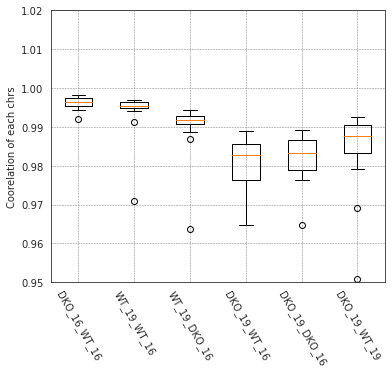

In [85]:
import re

all_data = [df_corr_set.iloc[:,0],df_corr_set.iloc[:,1],df_corr_set.iloc[:,2],df_corr_set.iloc[:,3],
            df_corr_set.iloc[:,4],df_corr_set.iloc[:,5]]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axes.boxplot(all_data, showfliers=True)#,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)

axes.set_ylabel('Coorelation of each chrs')
axes.set_ylim(0.95,1.02)
i=0
plt.setp( axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=df_corr_set.columns.values)
plt.xticks(rotation=-60)



In [98]:
#df_AB_summary=df_AB_summary.rename(columns={0:'#chr', 1:'start', 2:'end'})
df_AB = pd.read_csv(PATH_FEATURES+'AB_Compartment_Score_WT_DKO_CD8_with_Tcf1_Number.bdg', sep="\t", header=0)
df_AB_with_TCF1 = df_AB.loc[:,['#chr','start','end','Tcf1_Number']].merge(df_summary_Norm, on=['#chr','start','end'])
df_AB_top_500 = df_AB_with_TCF1.nlargest(500, 'Tcf1_Number')
df_AB_with_Tcf1 = df_AB_with_TCF1[df_AB_with_TCF1['Tcf1_Number']!=0]
df_AB_No_Tcf1 = df_AB_with_TCF1[df_AB_with_TCF1['Tcf1_Number']==0]
df_AB_top_500.head(1)

df_AB['Diff_16_ref'] = (df_AB['DKO'] - df_AB['WT'])/df_AB['DKO']

In [122]:
df_186 = df_AB_with_TCF1[(df_AB_with_TCF1['3_WT_16'] > 0) & (df_AB_with_TCF1['3_DKO_16'] < 0)]
df_166 = df_AB_with_TCF1[(df_AB_with_TCF1['3_WT_16'] < 0) & (df_AB_with_TCF1['3_DKO_16'] > 0)]
df_186
Feature_186=BedTool.from_dataframe(df_186)
Feature_166=BedTool.from_dataframe(df_166)

In [123]:
def feature_associated_genes(gene_annotation_path, feature_path):
    gene_annotation_Bed=BedTool(gene_annotation_path).sort()
    features_Bed=BedTool(feature_path).sort()
    
    #########################################################################################
    ## pre step remove the one overlap with DEGs promoter
    #feature_DEGs_Promoter=BedTool('313_259_DEGs_Promoter_Regions_ext_1kb.bed')
    #features_Bed = features_Bed.intersect(feature_DEGs_Promoter, u=True)
    #########################################################################################
    ### first association by overlap
    features_associated_genes = features_Bed.intersect(gene_annotation_Bed, wa=True, wb=True)
    df_all_group = pd.read_table(features_associated_genes.fn, header=None)
    ### Second associate rest features by cloest
    #features_no_overlap = features_Bed.intersect(gene_annotation_Bed,v=True)
    #if (features_no_overlap.count()!=0):
    #    features_closest_associated=features_no_overlap.closest(gene_annotation_Bed, t='all')
    #    df_features_closest_associated=pd.read_table(features_closest_associated.fn, header=None)
    #    df_all_group = df_all_group.append(df_features_closest_associated)
    
    return df_all_group

PATH_GENE_Promoter='/home/xli/Data/Haihui/CD8-HP/Summary/gene_promoter_1k_iv_unique.bed'


df_feature_associated_186= feature_associated_genes(Feature_186.fn, PATH_GENE_Promoter)
df_feature_associated_166= feature_associated_genes(Feature_166.fn, PATH_GENE_Promoter)

In [222]:
#df_input = pd.DataFrame(data= {'gene_id':df_feature_associated_166[3].values})
#df_genes = pd.read_csv('/home/xli/Data/Haihui/CD8-HP/Signature_Genes/325_Down_DEGs_Leading_Edge_Gene.txt', sep="\t")
df_genes = pd.read_csv('/home/xli/Data/Haihui/CD8-HP/Signature_Genes/847_Up_DEGs_Leading_Edge_Gene.txt', sep="\t")

df_feature_associated_186[[3]].merge(df_genes[['gene_id']], left_on=3, right_on='gene_id')[3].values

array(['Ell2', '1810046K07Rik'], dtype=object)

Text(0.5, 1.0, 'Top 500 Diff AB Decreased in DKO')

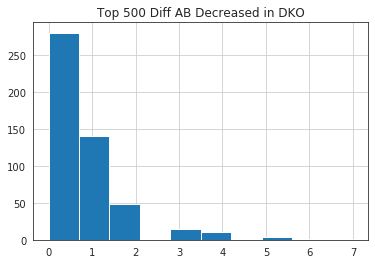

In [89]:
#df_summary_Norm#.nsmallest(500, 'Diff_16')['Diff_16_ref']
df_AB_with_TCF1.nsmallest(500, 'Diff_16')['Tcf1_Number'].hist()
plt.title("Top 500 Diff AB Decreased in DKO")

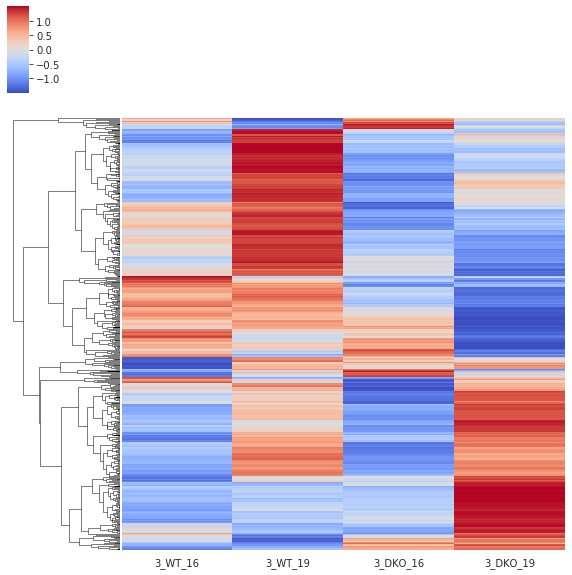

In [90]:
#.nlargest(500, 'Tcf1_Number')['Diff_16_ref']
df_sorted = df_AB_top_500.loc[:,['3_WT_16','3_WT_19','3_DKO_16','3_DKO_19']]

fig_1 = sns.clustermap( df_sorted,  yticklabels=False, col_cluster=False,\
z_score=0, cmap="coolwarm", row_cluster=True) # 

#sns.set(rc={'figure.figsize':(20,8.27)})

Parameters_Detail= "5clusters_z_score=0"


#fig_1.savefig('Heatmap1_Hdac_'+Parameters_Detail+'.png')

P_value is: 6.5e-14


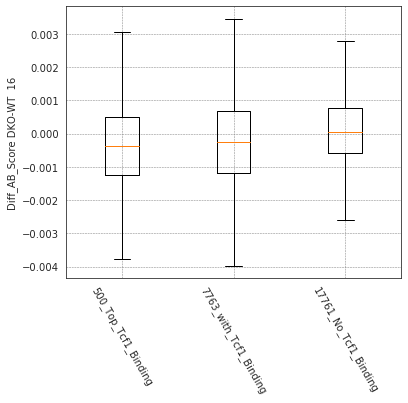

In [239]:
import re

all_data = [df_AB_top_500['Diff_16'],df_AB_with_Tcf1['Diff_16'], df_AB_No_Tcf1['Diff_16']]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axes.boxplot( all_data, showfliers=False)#,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)

axes.set_ylabel('Diff_AB_Score DKO-WT  16')
#axes.set_ylim(-0.0075,0.0075)
i=-1
plt.setp( axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=[str(len(all_data[1+i]))+'_Top_Tcf1_Binding',
                      str(len(all_data[2+i]))+'_with_Tcf1_Binding',
                      str(len(all_data[3+i]))+'_No_Tcf1_Binding'])
plt.xticks(rotation=-60)


from scipy import stats
MWU, pvalue = ( stats.mannwhitneyu(all_data[0], all_data[2], alternative='less' )[0], 
                stats.mannwhitneyu(all_data[0], all_data[2], alternative='less')[1])

if float("%.1e" % pvalue) == 1.0:
    plt.text(0.1, r'p = 1.0', fontsize=15)
    print('P_value is: %.1e' % pvalue )
else:
    if pvalue !=0:
        sign = '='
        digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
        print('P_value is: %.1e' % pvalue )
        #plt.text( 1.0, (0.1) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
    else:
        sign, digit, exp = '<', '1.0', '-300'
        print('P_value is: %.1e' % pvalue )
        #plt.text( 1.1, (0.11) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)

In [252]:
PATH_Output_Folder='/home/xli/Data/Haihui/CD8-HP/MSFigure/Figure1/'
df_AB_with_TCF1.to_csv(PATH_Output_Folder+today+'_AB_Score_With_Tcf1_number.bed', sep='\t', index=None)

P_value is: 2.0e-01


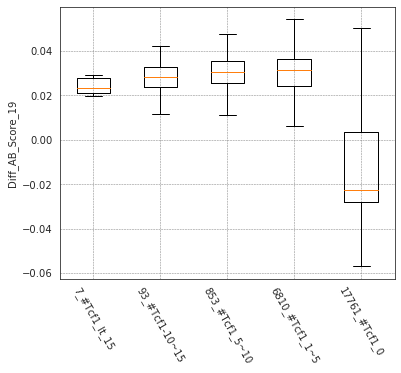

In [247]:
import re

all_data = [
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']>=15)]['3_WT_16'],
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']>=10)&(df_AB_with_TCF1['Tcf1_Number']<15)]['3_WT_16'],
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']>=5)&(df_AB_with_TCF1['Tcf1_Number']<10)]['3_WT_16'],
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']>=1)&(df_AB_with_TCF1['Tcf1_Number']<5)]['3_WT_16'],
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']==0)]['3_WT_16']]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axes.boxplot( all_data, showfliers=False)#,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)

axes.set_ylabel('Diff_AB_Score_19')
#axes.set_ylim(-0.0075,0.0075)
i=1
plt.setp( axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=[   str(len(all_data[-1+i]))+'_#Tcf1_lt_15',
                        str(len(all_data[0+i]))+'_#Tcf1-10~15',
                      str(len(all_data[1+i]))+'_#Tcf1_5~10',
                     str(len(all_data[2+i]))+'_#Tcf1_1~5',
                     str(len(all_data[3+i]))+'_#Tcf1_0'])
plt.xticks(rotation=-60)


from scipy import stats
MWU, pvalue = ( stats.mannwhitneyu(all_data[0], all_data[1], alternative=None )[0], 
                stats.mannwhitneyu(all_data[0], all_data[1], alternative='two-sided')[1])

if float("%.1e" % pvalue) == 1.0:
    plt.text(0.1, r'p = 1.0', fontsize=15)
    print('P_value is: %.1e' % pvalue )
else:
    if pvalue !=0:
        sign = '='
        digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
        print('P_value is: %.1e' % pvalue )
        #plt.text( 1.0, (0.1) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
    else:
        sign, digit, exp = '<', '1.0', '-300'
        print('P_value is: %.1e' % pvalue )
        #plt.text( 1.1, (0.11) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)

P_value is: 6.1e-01


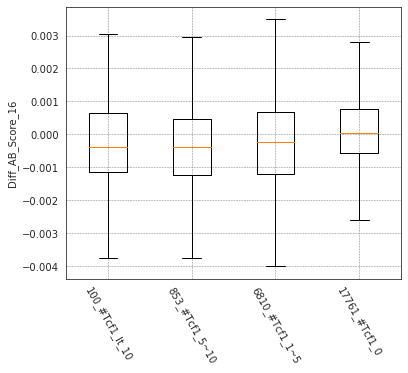

In [253]:
import re

all_data = [df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']>=10)]['Diff_16'],
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']>=5)&(df_AB_with_TCF1['Tcf1_Number']<10)]['Diff_16'],
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']>=1)&(df_AB_with_TCF1['Tcf1_Number']<5)]['Diff_16'],
df_AB_with_TCF1[(df_AB_with_TCF1['Tcf1_Number']==0)]['Diff_16']]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axes.boxplot( all_data, showfliers=False)#,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)

axes.set_ylabel('Diff_AB_Score_16')
#axes.set_ylim(-0.0075,0.0075)
i=0
plt.setp( axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=[ str(len(all_data[0+i]))+'_#Tcf1_lt_10',
                      str(len(all_data[1+i]))+'_#Tcf1_5~10',
                     str(len(all_data[2+i]))+'_#Tcf1_1~5',
                     str(len(all_data[3+i]))+'_#Tcf1_0'])
plt.xticks(rotation=-60)


from scipy import stats
MWU, pvalue = ( stats.mannwhitneyu(all_data[0], all_data[1], alternative=None )[0], 
                stats.mannwhitneyu(all_data[0], all_data[1], alternative='two-sided')[1])

if float("%.1e" % pvalue) == 1.0:
    plt.text(0.1, r'p = 1.0', fontsize=15)
    print('P_value is: %.1e' % pvalue )
else:
    if pvalue !=0:
        sign = '='
        digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
        print('P_value is: %.1e' % pvalue )
        #plt.text( 1.0, (0.1) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
    else:
        sign, digit, exp = '<', '1.0', '-300'
        print('P_value is: %.1e' % pvalue )
        #plt.text( 1.1, (0.11) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)

In [65]:
df_AB_with_TCF1.head(1)

,#chr,start,end,Tcf1_Number,3_WT_16,3_DKO_16,3_WT_19,3_DKO_19,WT_16_Ref,Diff_16,Diff_19
0,chr1,3200000,3300000,0,-0.020129,-0.019356,-0.020077,-0.020103,-0.021513,0.000773,-0.000026


0

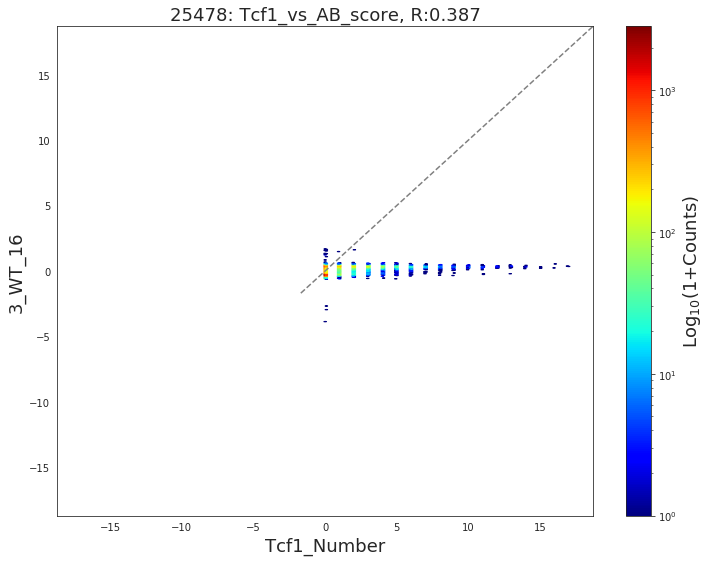

In [75]:
df=df_AB_with_TCF1.loc[:,['Tcf1_Number','3_WT_16']]

df['3_WT_16'] = df['3_WT_16']*11

highlight_name=['']
title_name='Tcf1_vs_AB_score, R:'+ str("{:.3f}".format(df.corr().iloc[0,1]))
hexbin_with_density(df, highlight_name, title_name, 'log',0)


0

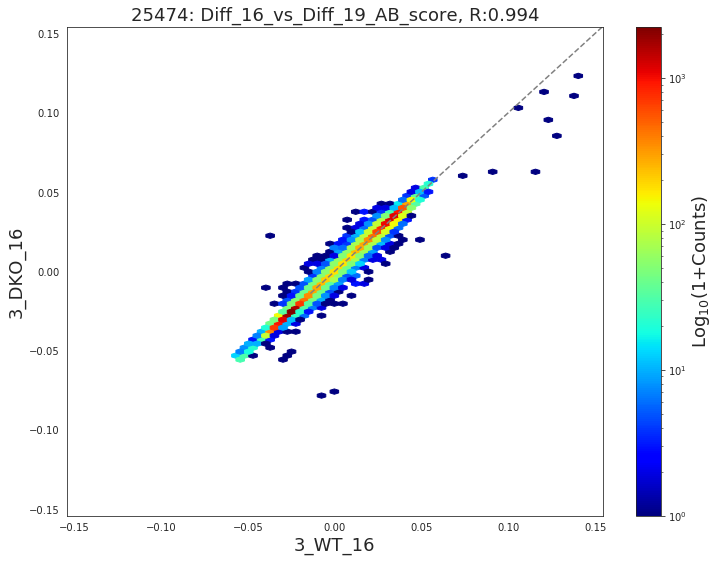

In [508]:
df=df_summary_Norm.loc[:,['3_WT_16','3_DKO_16']]
highlight_name=['']
title_name='Diff_16_vs_Diff_19_AB_score, R:'+ str("{:.3f}".format(df.corr().iloc[0,1]))
hexbin_with_density(df, highlight_name, title_name, 'log',4)


In [13]:
## this is for local
PATH_FEATURES='/home/xli/Data/Haihui/CD8-HP/Summary/'
# DNase
Path_WT_Specific_DNase = PATH_FEATURES+'987_WT_Specific_DNase_Peaks.bed6'
# Tcf1
Path_Tcf1=PATH_FEATURES+'B_19042_Feature_Tcf1_WT_CD8_peaks.bed8'

PATH_Region = Path_Tcf1

PATH_Feature= Path_Tcf1


Feature_Name='Tcf1'

Region_Name='Tcf1'
Title="Number_of_"+Feature_Name+ '_Bound_in_' + Region_Name +'_'


Features_Return_ob_exp_ratio(PATH_Feature, Path_Tcf1,0)

250.01633688745378

In [3]:
Folder_Name='/venn4/'
RAW_PATH=os.getcwd() +Folder_Name
OUT_PATH=os.getcwd()
os.listdir(RAW_PATH)


In [109]:
Input_Path="/home/xli/cloud_research/PengGroup/XLi/Data/Haihui/CD8-HP/RNA_seq/CuffDiff_Jun2018/Cuffdiff_Results/DKO_0h_vs_WT_0h"

df_Expression_all= generate_All_Genes(Input_Path,1)
#df_Expression_all= df_Expression_all[ df_Expression_all['q_value']<=0.05 ]
#df_Expression = generate_genes_FPKM_df(Input_Path)
#df_Expression=df_Expression.merge(df_Expression_all[['gene_id']],how='inner')

/home/xli/.conda/envs/py3_lx/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [145]:
os.listdir(RAW_PATH)

df_A_B = pd.read_csv(RAW_PATH+'290_genes_with_281_WT-A_to_DKO-B.bed', sep='\t')
df_B_A = pd.read_csv(RAW_PATH+'304_genes_with_302_WT-B_to_DKO-A.bed', sep='\t')

df_flip=df_A_B.merge(df_B_A, on='gene_id',how='outer',indicator='true')
df_flip['true']=df_flip['true'].str.replace('right_only', 'B TO A').str.replace('left_only', 'A TO B')


df_flip_expression = df_Expression.merge(df_flip,on='gene_id')


df_flip_expression=df_flip_expression[['gene_id','WT_0h_0', 'WT_0h_1', 'WT_0h_2', 'DKO_0h_1', 'DKO_0h_0',
       'DKO_0h_2','true']]

df_flip_expression=df_flip_expression.set_index('gene_id')

df_flip_expression_label=df_flip_expression[['true']]

df_flip_expression = df_flip_expression.drop(['true'], axis=1)
df_flip_expression = df_flip_expression.loc[(df_flip_expression!=0).any(axis=1)]
#df_flip_expression = df_flip_expression[(df_flip_expression['WT_0h']==0) & (df_flip_expression['DKO_0h']==0)]
df_flip_expression = df_flip_expression.merge(df_flip_expression_label, on='gene_id')
df_flip_expression = df_flip_expression[df_flip_expression['true']=='B TO A']

In [ ]:
df_sorted.transpose().loc[:,['WT_0h','DKO_0h']]
#df_sorted.transpose().values
sns.clustermap((df_sorted.transpose().values) , yticklabels=False, col_cluster=False,\
z_score=0, cmap="RdBu_r", row_cluster=False, row_colors = row_color )

In [100]:
df_flip_expression.to_csv('Genes_that_B_TO_A')

,WT_0h,DKO_0h,true
gene_id,,,
2310001H17Rik,13.347400,22.158900,B TO A
2610002M06Rik,4.973520,3.874060,B TO A
9430038I01Rik,5.600860,3.857290,B TO A
Atg7,12.553700,10.238700,B TO A
Clec2d,73.459000,100.472000,B TO A
Crmp1,0.843712,0.258136,B TO A
Cysltr2,1.288360,2.781180,B TO A
Ddx3y,33.527900,49.936400,B TO A
Dock5,1.923040,1.309410,B TO A


(42, 6)


{'B TO A': 'C1'}

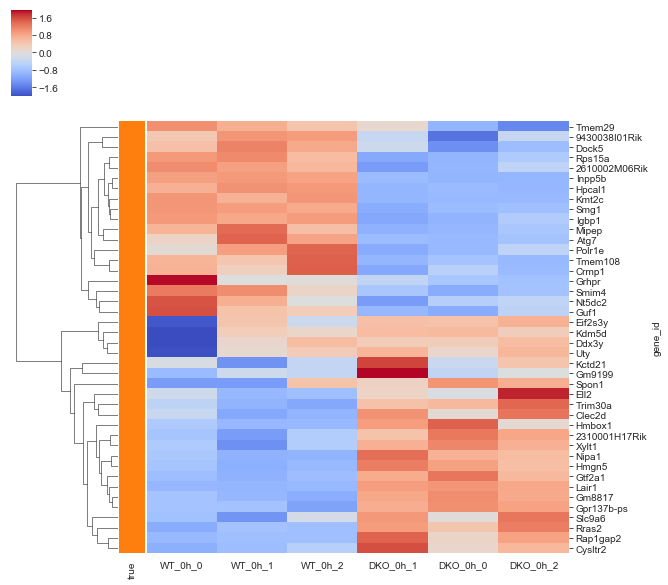

In [147]:
#### From raw clustered data with color bar

#### sort df via label and named df_sorted

df_sorted = df_flip_expression.sort_values(by=['true'])

###

df_sorted_label = df_sorted.loc[:,'true']



colors=[]
#colors=['red', 'orange', 'yellow', 'green', 'blue']
### OR Following Way to generate color.
for i in range(len(df_sorted_label.unique())):
    colors.append( "C"+ str(i+1))

#### generating color map, from label > color
lut = dict(zip(df_sorted_label.unique(), colors))
#### map color_label to every row of data
row_color = df_sorted.loc[:,'true'].map(lut)




#df_sorted = df_sorted.loc[:,'WT_0h', 'DKO_0h']
df_sorted = df_sorted.loc[:, ['WT_0h_0', 'WT_0h_1', 'WT_0h_2', 'DKO_0h_1', 'DKO_0h_0',
       'DKO_0h_2']]


print(df_sorted.shape)


fig_1 = sns.clustermap( (df_sorted),  yticklabels=True, col_cluster=False,\
z_score=0, cmap="coolwarm", row_cluster=True, row_colors = row_color) # 

#sns.set(rc={'figure.figsize':(20,8.27)})

Parameters_Detail= "5clusters_z_score=0"

fig_1.savefig('Heatmap1_Hdac_'+Parameters_Detail+'.png')
lut

In [94]:
#### From raw clustered data with color bar

#### sort df via label and named df_sorted

df_sorted = df_flip_expression.sort_values(by=['true'])
df_sorted_label = df_sorted.loc[:,'true']
###
df_sorted = df_sorted.transpose()



colors=[]
#colors=['red', 'orange', 'yellow', 'green', 'blue']
### OR Following Way to generate color.
for i in range(len(df_sorted_label.unique())):
    colors.append( "C"+ str(i))

#### generating color map, from label > color
lut = dict(zip(df_sorted_label.unique(), colors))
#### map color_label to every row of data
col_color = df_sorted.loc['true',:].map(lut)




#df_sorted = df_sorted.loc[:,'WT_0h', 'DKO_0h']
df_sorted = df_sorted.loc[['WT_0h', 'DKO_0h'],:]


print(df_sorted.shape)


fig_1 = sns.heatmap(df_sorted)#,  xticklabels=True, col_cluster=False,\
#z_score=1, cmap="RdBu_r", row_cluster=False, col_colors = col_color ) # 

#sns.set(rc={'figure.figsize':(20,8.27)})

#Parameters_Detail= "5clusters_z_score=0"

#fig_1.savefig('Heatmap1_Hdac_'+Parameters_Detail+'.png')
lut


(2, 78)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [95]:
df_sorted

gene_id,Gm2382,Noc3l,Slc9a7,Rsu1,Rrp15,Rps9,Rps13,Rdh13,Inadl,Firre,...,Hpcal1,Igbp1,Inpp5b,Kctd21,Kdm5d,Uty,Lair1,Mipep,Grhpr,Xylt1
WT_0h,5.60699,12.8637,2.11047,21.914,28.6069,4482.16,2744.93,5.93899,15.0946,1.23875,...,100.797,53.9292,37.6583,0.648334,8.9574,4.06752,2.00968,8.4684,11.9749,1.83102
DKO_0h,7.93669,9.78519,5.66728,15.144,19.3969,2874.27,1980.91,4.77238,11.3864,1.77539,...,54.4545,41.4254,20.7269,0.979399,14.4488,6.5822,5.08531,5.7451,8.69185,2.85092


In [11]:
#### Generate DEGs Seperately
#os.makedirs(os.getcwd()+'/genelist/')
PATH_FOLDER=os.getcwd()+ '/CuffDiff_Results/'
INPUT_LIST=os.listdir(PATH_FOLDER)
for input_name in INPUT_LIST:
    INPUT_PATH = PATH_FOLDER+input_name
    print ('Library:' + input_name)
    df_up = generate_Upregulated_Genes(INPUT_PATH)
    df_up.to_csv( os.getcwd()+'/genelist/up_'+input_name +'.bed' ,sep='\t')
    print ('# of Up:' )
    print(df_up.shape)
    
    df_down = generate_Downregulated_Genes(INPUT_PATH)  
    df_down.to_csv( os.getcwd()+'/genelist/down_'+input_name + '.bed' ,sep='\t')
    print ('# of Down')
    print(df_down.shape)
    print ('')


Library:Eed_KO_vs_Eed_WT
# of Up:
(131, 6)
# of Down
(32, 6)

Library:Hdac12_KO_vs_Hdac12_WT
# of Up:
(202, 6)
# of Down
(274, 6)



In [108]:
# For any input of /gene_exp.diff, return its All genes with
### gene_id, cond1, cond2, log2(fold_change), p_value, plus a number of order.
def generate_All_Genes(Input_Path, number):
#### READ FILE
    df = pd.read_csv(Input_Path+'/gene_exp.diff', sep='\t', header=0, usecols={'test_id',\
    'status','sample_1','sample_2','value_1','value_2','log2(fold_change)','p_value','q_value'})
#### Rename columns
    df=df.rename(columns={'test_id':'gene_id', 'value_1': df['sample_1'].unique()[0], 'value_2': df['sample_2'].unique()[0]})
#### Output   
    return df.loc[:,['gene_id',df['sample_1'].unique()[0],df['sample_2'].unique()[0],'log2(fold_change)',
                     'p_value','q_value', 'End_'+str(number), '||']].fillna('')
####################################################################################

## DEGS

### For any input of /gene_exp.diff, return its up_DEGs genes with
### gene_id, cond1, cond2, log2(fold_change), p_value, plus a number of order.
### Parameters for DEGs:
FC_UP=2.0
q_value_less=0.05
FPKM_threshold=1.0
####################################################################################


def generate_Upregulated_Genes(Input_Path):
#### READ FILE
    df = pd.read_csv(Input_Path+'/gene_exp.diff', sep='\t', header=0, usecols={'test_id',\
    'status','sample_1','sample_2', 'value_1','value_2','log2(fold_change)','p_value','q_value'})
#### Filter
    df=df[(df['status']=='OK') & (df['q_value']<=q_value_less) & (df['value_2']>=FPKM_threshold) & (df['log2(fold_change)'] >= np.log2(FC_UP))]
#### Rearrange Columns
    df=df.rename(columns={'test_id':'gene_id','value_1': df['sample_1'].unique()[0], 'value_2': df['sample_2'].unique()[0]})
#### Output
    return df.loc[:,['gene_id', df['sample_1'].unique()[0],df['sample_2'].unique()[0],'log2(fold_change)','p_value','q_value']]
####################################################################################

def generate_Downregulated_Genes(Input_Path):
#### READ FILE FROM CuffDiff Results
    df = pd.read_csv(Input_Path+'/gene_exp.diff', sep='\t', header=0, usecols={'test_id',\
    'status','sample_1','sample_2', 'value_1','value_2','log2(fold_change)','p_value','q_value'})
#### Filter
    df=df[(df['status']=='OK') & (df['q_value']<=q_value_less) & (df['value_1']>=FPKM_threshold) & (df['log2(fold_change)']<= -np.log2(FC_UP))]   
#### Rearrange Columns
    df=df.rename(columns={'test_id':'gene_id','value_1': df['sample_1'].unique()[0], 'value_2': df['sample_2'].unique()[0]})
#### Output
    return df.loc[:,['gene_id', df['sample_1'].unique()[0],df['sample_2'].unique()[0],'log2(fold_change)','p_value','q_value']]


#### Functions to read /genes.read_group_tracking and output FPKM
def generate_genes_FPKM_df(Input_Path):
    df = pd.read_csv(Input_Path+'/genes.read_group_tracking', sep='\t', header=0)
    FPKM_df = None
    for cond in df['condition'].unique():
        for replica in df[df['condition'] == cond]['replicate'].unique():
            #print (cond, replica)
            temp_df = (df[ (df['condition'] == cond) & (df['replicate'] == replica)].loc[:,['tracking_id', 'FPKM']])
            cond_name= cond+'_'+str(replica)
            temp_df.rename(columns={'tracking_id': 'gene_id', 'FPKM': cond_name }, inplace=True)
            if FPKM_df is None:
                FPKM_df
                FPKM_df = temp_df  
            else:
                FPKM_df = FPKM_df.merge(temp_df, on='gene_id', how='outer', suffixes=('','_'))
    return FPKM_df

def Add_common_header(df,common_header):
    name_list=[common_header]*len(df.columns)
    tuples = list(zip(name_list,df.columns))
    df.columns = pd.MultiIndex.from_tuples(tuples)
    return df


def DIR_CHECK_CREATE(Input_Path):
    if (not os.path.isdir(Input_Path)):
        print ("New Dir Made is" + Input_Path)
        os.mkdir(Input_Path)
    else: 
        print ('Dir Exists')
    return None
        
def Summary_Expression(Cuffdiff_Path, output_name):
    import datetime
    PATH_FOLDER=Cuffdiff_Path+ '/CuffDiff_Results'
    OUT_FOLDER=Cuffdiff_Path+'/CuffDiff_Results_Summary'

    DIR_CHECK_CREATE(PATH_FOLDER)
    DIR_CHECK_CREATE(OUT_FOLDER)

    INPUT_LIST=[f for f in os.listdir(PATH_FOLDER) if not f.startswith('.')]
    writer = pd.ExcelWriter(OUT_FOLDER+output_name+'_CuffDiff_Summary_'+str(datetime.date.today())+ '.xlsx', engine='xlsxwriter')

    i=0
    for input_name in INPUT_LIST[:]:
        INPUT_PATH = PATH_FOLDER+'/'+input_name
        print (INPUT_PATH)
        if (i==0):
            df_all=generate_genes_FPKM_df(INPUT_PATH)
            df_all[input_name]=''
            df_all = df_all.merge(generate_All_Genes(INPUT_PATH,i+1), on='gene_id', how='inner', suffixes=('','_')) 
            i+=1
            continue
        df_all = df_all.merge(generate_genes_FPKM_df(INPUT_PATH), on='gene_id', how='inner', suffixes=('','_'))
        df_all[input_name]=''
        df_all = df_all.merge(generate_All_Genes(INPUT_PATH,i+1), on='gene_id', how='inner', suffixes=('','_')) 

        i+=1
    df_all.to_excel(writer, sheet_name='All_Genes', index=None)

    ###### Generating a DEGs list in the last.
    DEGs_List=pd.DataFrame([],columns=['gene_id'])
    
    for input_name in INPUT_LIST:
        INPUT_PATH = PATH_FOLDER+'/'+input_name
        print ('Library:' + input_name)
        df_up = generate_genes_FPKM_df(INPUT_PATH)
        df_up[input_name]=''
        df_up = df_up.merge(generate_Upregulated_Genes(INPUT_PATH), on='gene_id', how='inner', suffixes=('','_'))
        df_up.to_excel( writer, sheet_name='up_'+input_name, index=None)

        DEGs_List=pd.concat([DEGs_List,df_up[['gene_id']]])
        print ('# of Up:' )
        print(df_up.shape)

        df_down = generate_genes_FPKM_df(INPUT_PATH)
        df_down[input_name]=''
        df_down = df_down.merge(generate_Downregulated_Genes(INPUT_PATH), on='gene_id', how='inner', suffixes=('','_')) 
        df_down.to_excel( writer, sheet_name='down_'+input_name,index=None)
        DEGs_List=pd.concat([DEGs_List,df_down[['gene_id']]])
        print ('# of Down')
        print(df_down.shape)
        print ('')

    print ("Total Number of DEGs is:" + str(len(DEGs_List['gene_id'].unique())))

    DEGs_List = pd.DataFrame( list(DEGs_List['gene_id'].unique()), columns=['gene_id'])
    DEGs_List.to_excel( writer, sheet_name='Union_DGEs_List',index=None)
    writer.save()
    ### Output A Excel Summary Completed!
    All_Gene_List = pd.DataFrame( list(df_all['gene_id'].unique()), columns=['gene_id'])
    
    df_DEGs=DEGs_List
    df_All_Genes=All_Gene_List
    for input_name in INPUT_LIST[:]:
        INPUT_PATH = PATH_FOLDER+'/'+input_name
        print ('Library:' + input_name)
        df_DEGs = df_DEGs.merge(generate_genes_FPKM_df(INPUT_PATH), on='gene_id',how='inner')
        df_All_Genes = df_All_Genes.merge(generate_genes_FPKM_df(INPUT_PATH), on='gene_id',how='inner')
    print ('# of DEGs:' )
    print(df_DEGs.shape)
    print ('# of All Genes (Excluding genes that RPKM of all conditions equal zero.')
    print(df_All_Genes.shape)
  
    
    return df_DEGs.set_index('gene_id'),df_All_Genes.set_index('gene_id')

## Generate Excel file contains all genes, and DEGs. 

In [97]:
def PCA_heatmap(df):
    import matplotlib
    matplotlib.use('AGG')
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_style("white") 
   # display plots in this notebook
    %matplotlib inline
### Drop all zeros rows for plot
    Heatmap_Df = df.loc[(df!=0).any(axis=1)]

    Heatmap_Name='DEGs_'+str(len(Heatmap_Df.index))
    #### Very Important
    #Heatmap_Df=FPKM_df.fillna(0)
    fig_1 = sns.clustermap(Heatmap_Df,  yticklabels=False, z_score=0, col_cluster=True, cmap='RdBu_r' )
    fig_1.savefig(Heatmap_Name+'.png')
    fig_1.fig.suptitle(Heatmap_Name)
    Heatmap_Df.shape
    
    ###### PCA
    # PCA
    df_2 = df #.reset_index()

    #### Remove unicode of list in python 
    df2_gene_id = [x.encode('ascii', 'ignore') for x in df_2.index]


    from sklearn.decomposition import PCA
    from sklearn import datasets
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.preprocessing import StandardScaler

    #### In here we set targets as the name of columns, which means our purpose is to compare \
    #### the relationship between different columns.
    targets= [x.encode('ascii', 'ignore') for x in df_2.columns]

    colors=[]
    for i in range(len(targets)):
        colors.append( "C"+ str(i))
        #print(colors[i])

    ################################################################################

    df_2_T = df_2.transpose()

    # Separating out the features
    x = df_2_T.loc[ :, df2_gene_id ].values


    # Separating out the target
    y = df_2_T.loc[targets,:].values


    # Standardizing the featuresbio
    x = StandardScaler().fit_transform(x)

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])


    ########### THIS is fucking killing me. reindex df with df2, just using following command.
    principalDf.index = df_2_T.index

    #finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
    principalDf

    ### PLOT

    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)

    colors = ['C5','C5',
              'C4','C3','C4',
              'C9','C9',
              'C1','C1','C1','C1',
              'C0','C1', 
              'C6','C6','C6',
              'C2','C2','C2',
              'C3','C3','C3']

    for target, color in zip( targets,colors):
        indicesToKeep = principalDf.index == target
        ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
                   , principalDf.loc[indicesToKeep, 'principal component 2']
                   , s = 100, c=color, alpha=0.9)
    ax.legend(targets)
    #ax.set_xlim(-2,8)
    ax.grid()
    Parameters_Detail='xx'
    fig.savefig('PCA'+Parameters_Detail+'.png')
    df_ALL_DEGs.shape
    return None

In [91]:
df_DEGs, df_ALL_Genes = Summary_Expression(os.getcwd(), 'Eed_Hdac12')

Dir Exists
Dir Exists
/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/2019/1901/Treg_RNA_seq/CuffDiff_Results/Eed_KO_vs_Eed_WT
/home/lxiang/cloud_research/PengGroup/XLi/Data/Haihui/2019/1901/Treg_RNA_seq/CuffDiff_Results/Hdac12_KO_vs_Hdac12_WT
Library:Eed_KO_vs_Eed_WT
# of Up:
(129, 12)
# of Down
(30, 12)

Library:Hdac12_KO_vs_Hdac12_WT
# of Up:
(187, 13)
# of Down
(273, 13)

Total Number of DEGs is:531
Library:Eed_KO_vs_Eed_WT
Library:Hdac12_KO_vs_Hdac12_WT
# of DEGs:
(531, 12)
# of All Genes (Excluding genes that RPKM of all conditions equal zero.
(24346, 12)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/usr/local/lib/python2.7/dist-packag

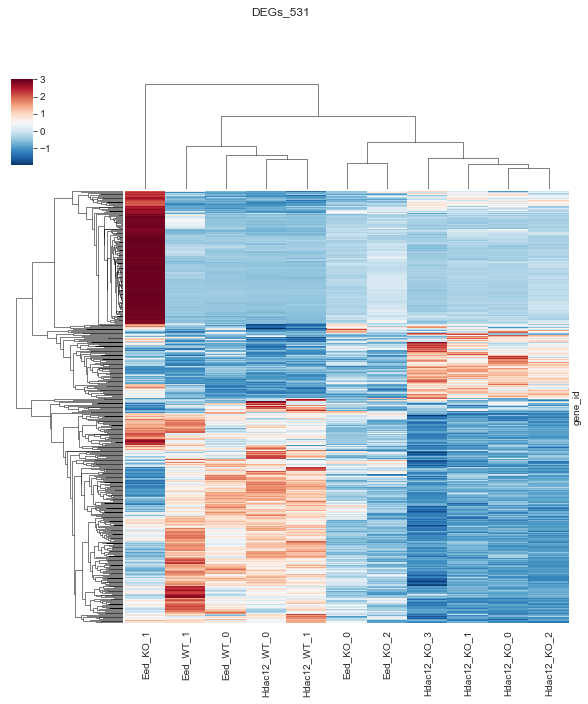

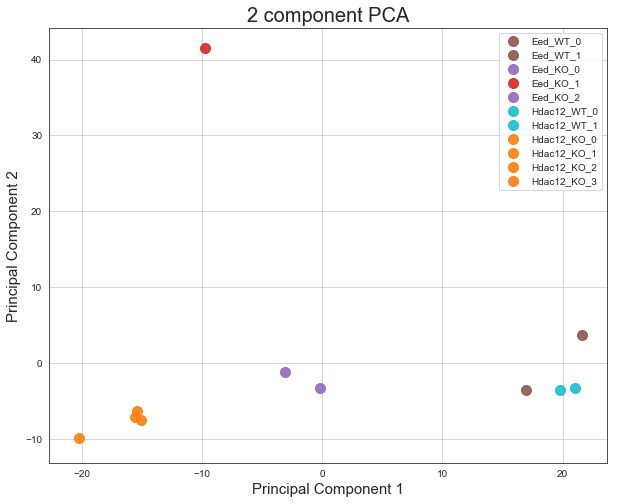

In [98]:
PCA_heatmap(df_DEGs)

## From above we can continue using:
# "df_ALL_DEGs" for plot

# Plot Part

In [7]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

# Venn 2 and 3D

In [5]:
def Generate_Venn_Diagram(Raw_Path, Out_Path, Merge_Column):
    from matplotlib_venn import venn2
    
    DIR_CHECK_CREATE(Raw_Path)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')

        ### Union A and B, use indicator to differentiate them.
        union_A_B=df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer', indicator=True)

        intersection_A_B=union_A_B[union_A_B['_merge']=='both']
        only_A=union_A_B[union_A_B['_merge']=='left_only']
        only_B=union_A_B[union_A_B['_merge']=='right_only']

        #Output
        intersection_A_B.to_csv(OUT_PATH+'/Intersection_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_A.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[0][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_B.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        union_A_B.to_csv(OUT_PATH+'/Union_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')


    out = venn2(subsets=(len(only_A[Merge_Column]), len(only_B[Merge_Column]), len(intersection_A_B[Merge_Column])),
          set_labels=(INPUT_LIST[0][:-4], INPUT_LIST[1][:-4] ) )
    for text in out.subset_labels:
        text.set_fontsize(18)
    plt.show()
    
def Generate_Venn3_Diagram(Raw_Path, Out_Path, Merge_Column):
    from matplotlib_venn import venn3, venn3_circles
    
    DIR_CHECK_CREATE(Raw_Path)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 3:
        print ('Input Three, Continue.')
        PATATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C = df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C),3), dtype=int)


        for j in range(len(union_A_B_C)):
            if (union_A_B_C.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConC})

        intersection_metrix = intersection_metrix*1


        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        #intersection_metrix
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC

        A_solo = len(df_A) - ABC - AC - AB 
        B_solo = len(df_B) - ABC - BC - AB 
        C_solo = len(df_C) - ABC - AC - BC
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,8))
    out = venn3(subsets = (A_solo, B_solo, AB, C_solo, AC, BC,ABC), \
    set_labels = (ConA, ConB, ConC))
    for text in out.subset_labels:
        text.set_fontsize(18)



In [ ]:
Folder_Name='Down'
RAW_PATH=os.getcwd() + '/genelist/Venn/' + Folder_Name
OUT_PATH=os.getcwd() + '/genelist/Venn/Results_' + Folder_Name

Generate_Venn3_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

Dir Exists
Dir Exists
Input File: 
['up_DKO_0h_vs_WT_0h.bed', 'Up_DKO_CD8_0h_over_WT_CD8_0h_ZZ.bed']
Input Two, Continue.


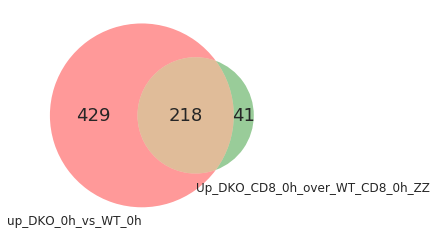

In [14]:
Folder_Name='Up'
RAW_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/' + Folder_Name
OUT_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/Results_' + Folder_Name

Generate_Venn_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

In [28]:
#df_all
#df_ALL_DEGs


# heatmap

(16856, 11)

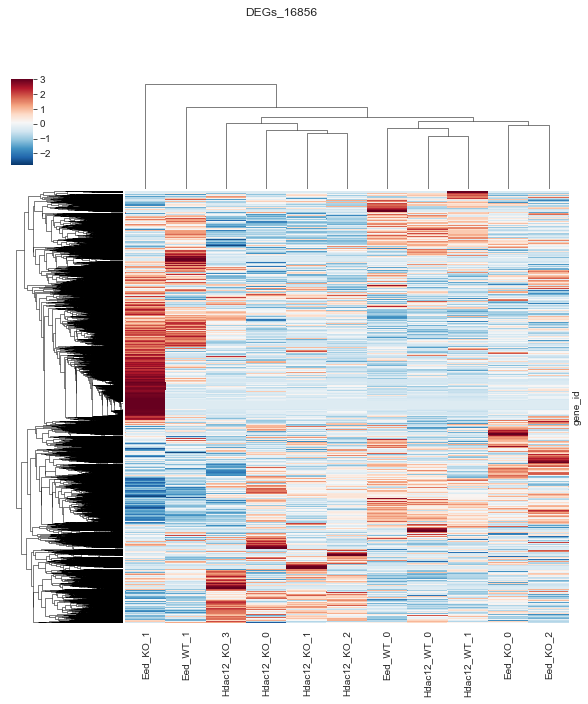

In [29]:
### Drop all zeros rows for plot
df_tem = df_ALL_DEGs
Heatmap_Df = df_tem.loc[(df_tem!=0).any(axis=1)]

Heatmap_Name='DEGs_'+str(len(Heatmap_Df.index))
#### Very Important

#Heatmap_Df=FPKM_df.fillna(0)

fig_1 = sns.clustermap(Heatmap_Df,  yticklabels=False, z_score=0, col_cluster=True, cmap='RdBu_r' )
fig_1.savefig(Heatmap_Name+'.png')
fig_1.fig.suptitle(Heatmap_Name)
Heatmap_Df.shape

# PCA



## Input a DataFrame then plot.

In [33]:
# PCA
df_2 = df_ALL_DEGs #.reset_index()

#### Remove unicode of list in python 
df2_gene_id = [x.encode('ascii', 'ignore') for x in df_2.index]


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#### In here we set targets as the name of columns, which means our purpose is to compare \
#### the relationship between different columns.
targets= [x.encode('ascii', 'ignore') for x in df_2.columns]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

################################################################################

df_2_T = df_2.transpose()

# Separating out the features
x = df_2_T.loc[ :, df2_gene_id ].values


# Separating out the target
y = df_2_T.loc[targets,:].values


# Standardizing the featuresbio
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


########### THIS is fucking killing me. reindex df with df2, just using following command.
principalDf.index = df_2_T.index

#finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
principalDf

,principal component 1,principal component 2
Eed_WT_0,16.954764,-3.477434
Eed_WT_1,21.603511,3.691825
Eed_KO_0,-0.197229,-3.255987
Eed_KO_1,-9.785572,41.473844
Eed_KO_2,-3.082363,-1.127632
Hdac12_WT_0,21.019142,-3.239308
Hdac12_WT_1,19.760730,-3.471914
Hdac12_KO_0,-15.053977,-7.426428
Hdac12_KO_1,-15.587654,-7.051295
Hdac12_KO_2,-15.403975,-6.232757


(531, 11)

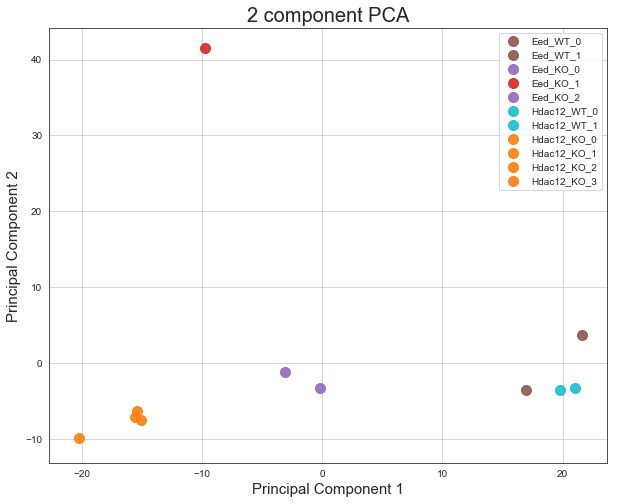

In [34]:
### PLOT

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['C5','C5',
          'C4','C3','C4',
          'C9','C9',
          'C1','C1','C1','C1',
          'C0','C1', 
          'C6','C6','C6',
          'C2','C2','C2',
          'C3','C3','C3']

for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100, c=color, alpha=0.9)
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='xx'
fig.savefig('PCA'+Parameters_Detail+'.png')
df_ALL_DEGs.shape

## Violin Plot

In [29]:
all_data=[np.log1p((df3.iloc[:,0])), np.log1p((df2.iloc[:,0]))]

y_max, y_min = (max( [max(x)  for x in all_data ]), min( [min(x)  for x in all_data ]))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
axes.violinplot( all_data,showmeans=False,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)
#axes.set_xlabel('Frequency')
axes.set_ylabel('log1p(RPKM)')
axes.set_ylim(y_min-1,y_max+1)



plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['Intersection_'+str(len(all_data[0])), 'Only_Tcf1_'+str(len(all_data[1]))])



from scipy import stats
MWU, pvalue = ( stats.mannwhitneyu((df3.iloc[:,0]), (df2.iloc[:,0]), alternative=None )[0], 
                stats.mannwhitneyu((df3.iloc[:,0]), (df2.iloc[:,0]), alternative='two-sided')[1])
#print "U= %d p = %.1e" % (MWU, pvalue)

if float("%.1e" % pvalue) == 1.0:
    plt.text(0.1, r'p = 1.0', fontsize=15)
    print('P_value is: %.1e' % pvalue )
else:
    if pvalue !=0:
        sign = '='
        digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
    else:
        sign, digit, exp = '<', '1.0', '-300'
        print('P_value is: %.1e' % pvalue )
        plt.text( 1.1, (y_max+0.5) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
        

NameError: name 'df3' is not defined

In [ ]:
df0_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_a = df0_a.set_index('gene_id').dropna(axis=0, how='any')
df0_a = df0_a.loc[ (df0_a['RPKM'] > 0 ) ]
df0_a = df0_a.rename(columns={'RPKM':'RPKM_WT_Only_Foxp3'})

df0_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_b = df0_b.set_index('gene_id').dropna(axis=0, how='any')
df0_b = df0_b.loc[ (df0_b['RPKM'] > 0 ) ]
df0_b = df0_b.rename(columns={'RPKM':'RPKM_KO_Only_Foxp3'})

###################################################################################################################
df1_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_a = df1_a.set_index('gene_id').dropna(axis=0, how='any')
df1_a = df1_a.loc[ (df1_a['RPKM'] > 0 ) ]
df1_a = df1_a.rename(columns={'RPKM':'RPKM_WT_Intersection'})

df1_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_b = df1_b.set_index('gene_id').dropna(axis=0, how='any')
df1_b = df1_b.loc[ (df1_b['RPKM'] > 0 ) ]
df1_b = df1_b.rename(columns={'RPKM':'RPKM_KO_Intersection'})

###################################################################################################################
df2_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_a = df2_a.set_index('gene_id').dropna(axis=0, how='any')
df2_a = df2_a.loc[ (df2_a['RPKM'] > 0 ) ]
df2_a = df2_a.rename(columns={'RPKM':'RPKM_WT_Only_Treg'})

df2_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_b = df2_b.set_index('gene_id').dropna(axis=0, how='any')
df2_b = df2_b.loc[ (df2_b['RPKM'] > 0 ) ]
df2_b = df2_b.rename(columns={'RPKM':'RPKM_KO_Only_Treg'})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

axes[0,0].violinplot(  (np.log10(df0_a.iloc[:,0])),showmeans=False,showmedians=True )
axes[0,0].set_title('gene_list_WT_Only_FoxP3_'+str(len(df0_a)))

axes[1,0].violinplot( ( np.log10(df0_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,0].set_title('gene_list_KO_Only_FoxP3_'+str(len(df0_b)))



axes[0,1].violinplot( ( np.log10(df1_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,1].set_title('gene_list_WT_Intersection_'+str(len(df1_a)))

axes[1,1].violinplot( ( np.log10(df1_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,1].set_title('gene_list_KO_Intersection_'+str(len(df1_b)))



axes[0,2].violinplot( ( np.log10(df2_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,2].set_title('gene_list_WT_Only_Treg_'+str(len(df2_a)))

axes[1,2].violinplot( ( np.log10(df2_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,2].set_title('gene_list_KO_Only_Treg_'+str(len(df2_b)))



for i in range(2):
    for j in range(3):
        ax=axes[i,j]
        ax.yaxis.grid(True)
        #ax.set_xticks([y + 1 for y in range(max(df1))])
        ax.set_ylim(-0.5,2)
        ax.set_xlabel('Frequency')
        ax.set_ylabel('log10(RPKM)')

fig.savefig('gene_list_WT_KO.png') 

# Scattering Plot + Heatmap

In [502]:
def hexbin_with_density(df, highlight_name, title_name, density_scale, drop_top_outlier):
    ### drop outlier
    import re
    df = df.drop(df.iloc[:,0].nlargest(n=drop_top_outlier,keep='first').index)
    
    
    range_limit=df.max().max()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 9), sharex=False, sharey=False)
    
    if density_scale == 'log':
        hb = ax.hexbin(df.iloc[:,[0]], df.iloc[:,[1]], gridsize=(100,100), cmap=plt.cm.jet,
                   bins='log',mincnt=1,alpha=2, edgecolors='face')
        cb = fig.colorbar(hb,ax=ax)
        cb.set_label('Log$_{10}$(1+Counts)', fontsize=18)
    else:
        hb = ax.hexbin(df.iloc[:,[0]], df.iloc[:,[1]], gridsize=(100,100), cmap=plt.cm.jet,
                   mincnt=1,alpha=2, edgecolors='face')
        cb = fig.colorbar(hb,ax=ax)
        cb.set_label('Counts', fontsize=18)

    ###  highlight a point
    if len(highlight_name) >= 1:
        for highlight_index in highlight_name[:]:
            ax.scatter(df[df.index == highlight_index].iloc[:,[0]],
                        df[df.index == highlight_index].iloc[:,[1]],
                        alpha=1.0,s=50,color='red', label=highlight_index,edgecolor='red')
            ax.text(df[df.index == highlight_index].iloc[:,0]-range_limit/20.0,
                      df[df.index == highlight_index].iloc[:,1]+range_limit/25.0, highlight_index, fontsize=16, color='r')


    ax.yaxis.grid(False)
    ax.set_ylim(-1*range_limit,range_limit+0.1*range_limit)
    ax.set_xlim(-1*range_limit,range_limit+0.1*range_limit)
    ax.set_xlabel(str(df.columns[0]), fontsize=18)
    ax.set_ylabel(str(df.columns[1]), fontsize=18)
    ax.plot([-0.1*range_limit,range_limit+0.1*range_limit], [-0.1*range_limit, range_limit+0.1*range_limit], ls="--", c="gray")
    ax.set_title(str(len(df))+ ': '+ title_name , fontsize=18)
    
    
    
    from scipy.stats import pearsonr
    r, pvalue = ( pearsonr((df.iloc[:,0]), (df.iloc[:,1]))[0], 
                    pearsonr((df.iloc[:,0]), (df.iloc[:,1]))[1])
    #print "U= %d p = %.1e" % (MWU, pvalue)

    
    print (df.iloc[:,[0,1]].columns[0],"&", df.iloc[:,[0,1]].columns[1])
    if float("%.1e" % pvalue) == 1.0:
        plt.text(range_limit/2-0.1*range_limit, range_limit+0.17*range_limit, r'p = 1.0', fontsize=15)
        print('Pearson_r is: %.1e' % round(r,4) )
        print('P_value is: %.1e' % pvalue )
    else:
        if pvalue !=0:
            sign = '='
            digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
            plt.text(range_limit/2-0.35*range_limit, range_limit+0.17*range_limit, r'Pearson_r {} {} with P_value {} {} x $10^{{{}}}$'.format(sign, round(r,4), sign, digit, int(exp)), fontsize=15)
            print('Pearson_r is: %.4f' % r )
            print('P_value is: %.1e' % pvalue )
        else:
            sign, digit, exp = '<', '1.0', '-300'
            plt.text(range_limit/2-0.35*range_limit, range_limit+0.17*range_limit, r'Pearson_r {} {} with P_value {} {} x $10^{{{}}}$'.format(sign, round(r,4), sign, digit, int(exp)), fontsize=15)
            print('Pearson_r is: %.4f' % r )
            print('P_value is: %.1e' % pvalue )
    return 0

In [101]:
df_ALL_DEGs.columns

Index([u'Eed_WT_1', u'Eed_WT_0', u'Eed_KO_0', u'Eed_KO_1', u'Eed_KO_2',
       u'Hdac12_WT_1', u'Hdac12_WT_0', u'Hdac12_KO_0', u'Hdac12_KO_1',
       u'Hdac12_KO_2', u'Hdac12_KO_3'],
      dtype='object')

Hdac12_KO_1 & Hdac12_KO_2
Pearson_r is: 0.9621
P_value is: 1.4e-308


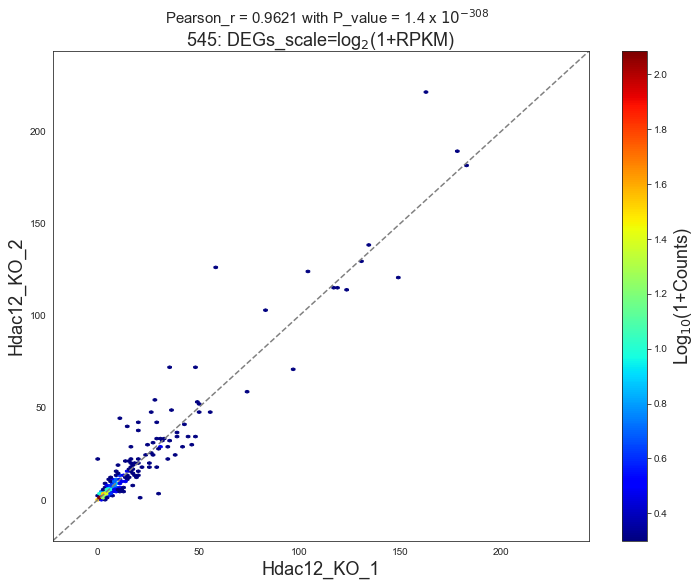

In [114]:
aa = hexbin_with_density(df_ALL_DEGs.iloc[:,[8,9]],'', 'DEGs_scale=log$_2$(1+RPKM)', 'log',0)


'Eed_WT_1'

In [ ]:
from scipy.stats import gaussian_kde
        # Calculate the point density
    fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=False, sharey=True)

    range_limit=1000
    xy = np.vstack([df_gene_Intersection_WT, df_gene_Intersection_KO])
    z = gaussian_kde(xy)(xy)

    axis[1].axis('equal')
    cax_1 = axis[1].scatter(df_gene_Intersection_WT, df_gene_Intersection_KO, alpha=1.0,s=5,c=z, label='Intersection',edgecolor='')
    
    ###  highlight a point
    highlight_index='Tcf7'
    axis[1].scatter(df_gene_Intersection_WT[df_gene_Intersection_WT.index == highlight_index],
                df_gene_Intersection_KO[df_gene_Intersection_KO.index == highlight_index],
                alpha=1.0,s=50,color='blue', label=highlight_index,edgecolor='blue')
    axis[1].text(df_gene_Intersection_WT[df_gene_Intersection_WT.index == highlight_index]+range_limit/20,
                df_gene_Intersection_KO[df_gene_Intersection_KO.index == highlight_index]-range_limit/20, highlight_index, fontsize=14)
    ###
    
    axis[1].set_title('Intersection: '+ str(len(df_gene_Intersection_WT)) + ' elements')
    axis[1].plot([0,range_limit], [0, range_limit], ls="--", c=".3")
    
    
    
    
    axis[0].axis('equal')
    xy = np.vstack([df_gene_Only_Foxp3_WT, df_gene_Only_Foxp3_KO])
    z = gaussian_kde(xy)(xy)
    cax_0 = axis[0].scatter(df_gene_Only_Foxp3_WT, df_gene_Only_Foxp3_KO, alpha=1.0,s=5, c=z, label='Only_Foxp3',edgecolor='')
    axis[0].set_title('Only_Foxp3: ' + str(len(df_gene_Only_Foxp3_WT))+' elements')
    axis[0].plot([0,range_limit], [0, range_limit], ls="--", c=".3")
    

    axis[2].axis('equal')
    xy = np.vstack([df_gene_Only_Tcf1_WT, df_gene_Only_Tcf1_KO])
    z = gaussian_kde(xy)(xy)
    cax_2 = axis[2].scatter(df_gene_Only_Tcf1_WT, df_gene_Only_Tcf1_KO, alpha=1.0,s=5, c=z, label='Only_Tcf1',edgecolor='')
    axis[2].set_title( 'Only_Tcf1: '+str(len(df_gene_Only_Tcf1_WT))+' elements')
    axis[2].plot([0,range_limit], [0, range_limit], ls="--", c=".3")
    
    for ax in axis:
            ax.yaxis.grid(True)
            ax.set_ylim(-50,range_limit)
            ax.set_xlim(-50,range_limit)
            ax.set_xlabel('WT_RPKM')
            ax.set_ylabel('KO_RPKM')

fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7]) # A 4-length sequence of [left, bottom, width, height] quantities.
#fig.colorbar(cax=cbar_ax)



    